# Pymaceuticals Inc.
---

### Analysis

#Observation 1: The bar plots showed that the total number of mice tested for each drug showed that Capomulin and Ramicane had the most mice tested. Observation 2: The box plot graph showed that for the final tumor volume of each mouse across four of the treatment regimens showed that Capomulin and Ramicane had a lower median tumor volume. Observation 3: The scatter plot graph shows that for the Capomulin regimen there is a positive correlation between mouse weight and average tumor volume. 

 

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import pearsonr
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
num_mice = merged_df.groupby('Mouse ID')['Timepoint'].count().count()
num_mice

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merged_df.loc[merged_df['Mouse ID'] == duplicates[0]]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_df['Mouse ID'].nunique()
num_mice

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
mean = grouped_df.mean()
median = grouped_df.median()
variance = grouped_df.var()
std_dev = grouped_df.std()
sem = grouped_df.sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': variance, 'Standard Deviation': std_dev, 'SEM': sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Using the aggregation method, produce the same summary statistics in a single line.
summary_df = summary_df.rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

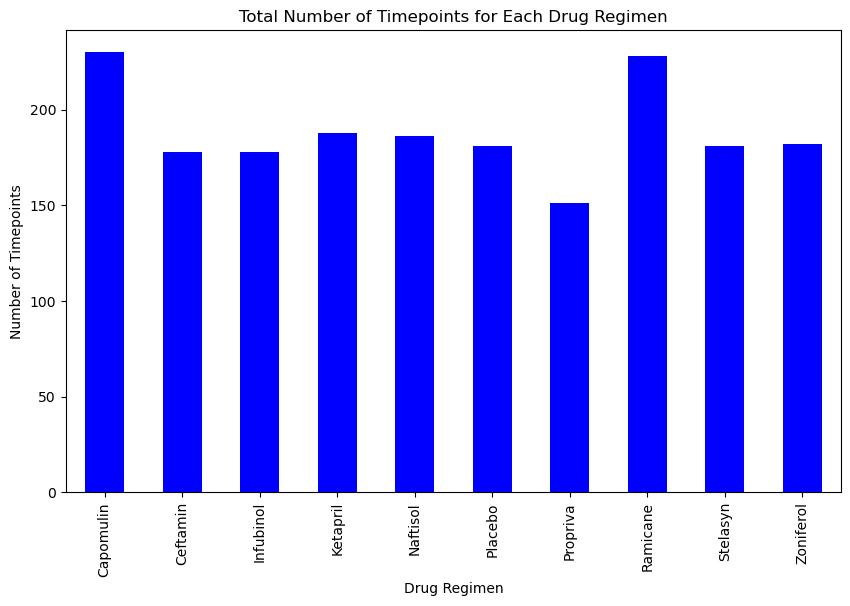

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Count the number of timepoints for each drug regimen
timepoints_df = clean_df.groupby('Drug Regimen')['Timepoint'].count()

# Create a bar plot
timepoints_df.plot(kind='bar', figsize=(10, 6), color='blue')

# Set the title and axis labels
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')

# Show the plot
plt.show()


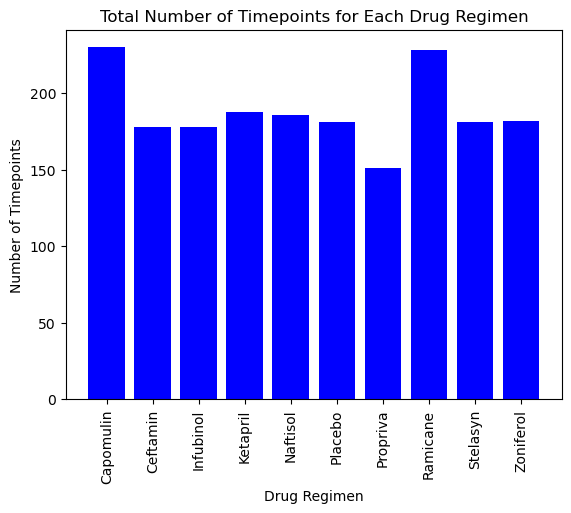

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Create a bar plot using Pyplot
plt.bar(timepoints_df.index, timepoints_df.values, color='blue')

# Set the title and axis labels
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')

# x-axis labels
plt.xticks(rotation='vertical')

plt.show()


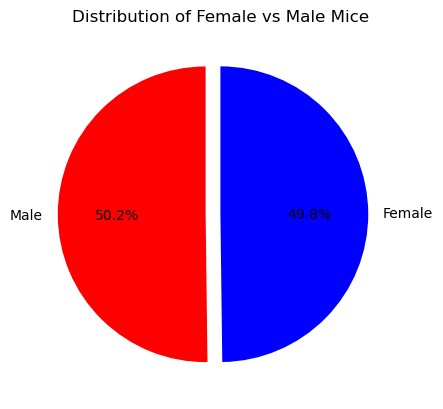

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of male and female mice
gender_counts = mouse_metadata['Sex'].value_counts()

# Create a pie plot
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                   colors=['red', 'blue'], explode=[0.1, 0])

# Set the title and axis labels
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('')

plt.show()


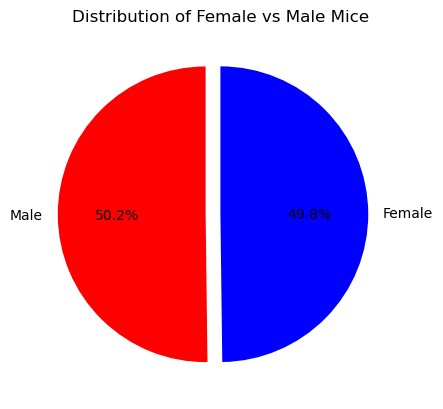

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create a pie plot using Pyplot
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=['red', 'blue'], explode=[0.1, 0])

# Set the title
plt.title('Distribution of Female vs Male Mice')

plt.show()


## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
regimen_data = merged_data.loc[merged_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = regimen_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_tp = pd.merge(last_timepoint, regimen_data, on=['Mouse ID', 'Timepoint'])
final_tumor_volume = merged_last_tp[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
final_tumor_volume

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


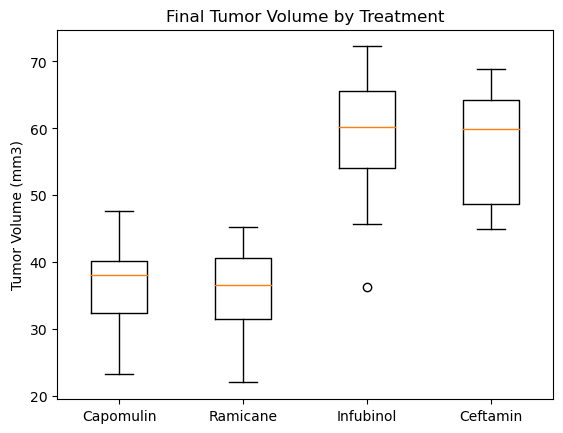

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group
data = []
for regimen in ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']:
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    data.append(tumor_volumes)

fig, ax = plt.subplots()
ax.boxplot(data, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Final Tumor Volume by Treatment')
plt.show()

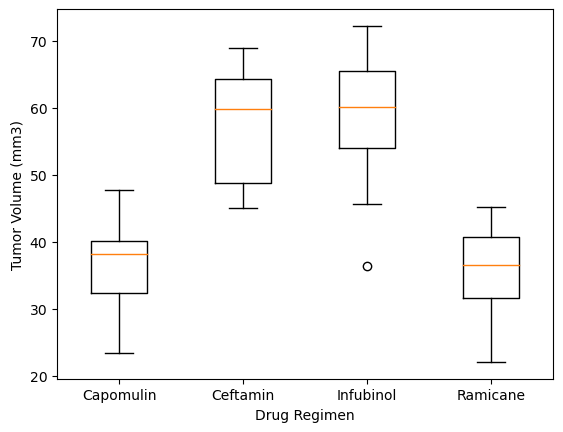

In [36]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volumes = final_tumor_volume.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)

# Create a box plot of the tumor volume data for each drug regimen
fig, ax = plt.subplots()
ax.boxplot(tumor_volumes)
ax.set_xticklabels(tumor_volumes.index)
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

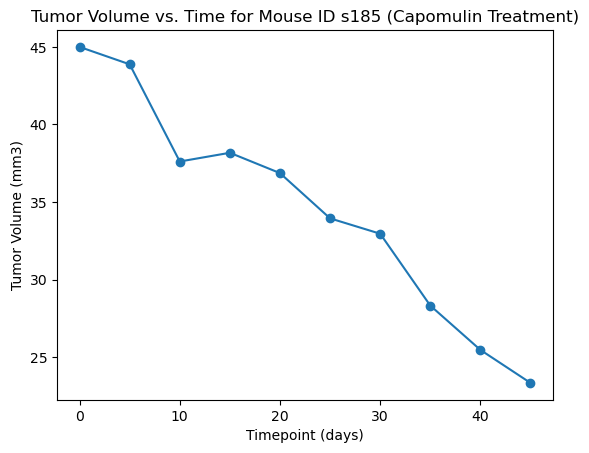

In [41]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

capomulin_data = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]

# random mouse ID
mouse_id = "s185"

mouse_data = capomulin_data.loc[capomulin_data["Mouse ID"] == mouse_id]
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker="o")

# Add axis labels and title
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Time for Mouse ID {mouse_id} (Capomulin Treatment)")
plt.show()


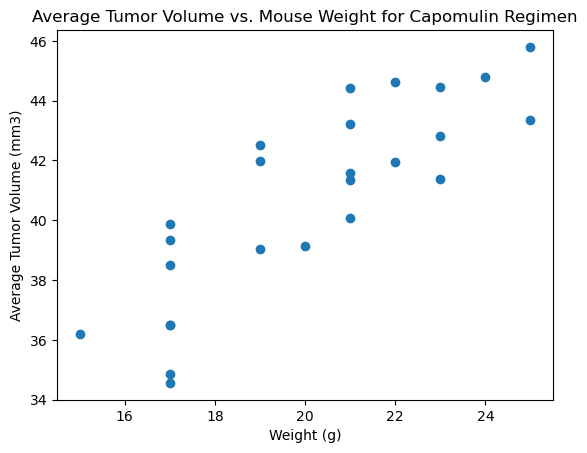

In [43]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Calculate the average tumor volume and mouse weight
capomulin_avg = capomulin_data.groupby('Mouse ID').mean()[['Tumor Volume (mm3)', 'Weight (g)']]

# scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


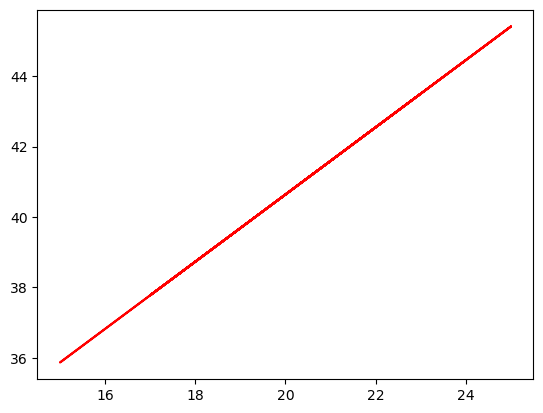

In [55]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the correlation coefficient
corr_coefficient, p_value = pearsonr(mouse_weight, avg_tumor_volume)
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {corr_coefficient:.2f}")

# Calculate the linear regression model
slope, intercept, rvalue, pvalue, stderr = linregress(mouse_weight, avg_tumor_volume)
regress_values = slope * mouse_weight + intercept
plt.plot(mouse_weight, regress_values, "r-")

# Show the plot
plt.show()